### Given
Density of bacteria in plate = $\rho= 10/cm^2$
Area $A=10cm^2$
Probability of a bacteria carrying mutation = $\mu$


### Facts

Bacteria on plate are like 'white and black' balls in a box with thw white ones representing the mutated copies.
Thus, assuming total number $N \sim Poisson(\lambda)$ and the coordinates $(X_i,Y_i)$ to be in a uniform square(assume the 'dish' to be square ) it is safe to assume, that this is a poisson point process with intensity $\mu$ and the mutated 'whites' make it a poisson coloring problem.

Hence, if $MW$ represents the mutated whites and $UB$ represent the unmutated black balls, we have 

$MW \sim PPP(\mu\rho)$ and $UB \sim PPP((1-\mu)\rho)$


Thus for part (a): P(probability that n 'mutated whites' exist) = $\frac{e^{-\rho\mu A}(\mu\rho A)^n}{n!}$



### Part (b)

In [1]:
from math import log, exp, e
t_min_grow = log(10)/log(1.05)
rho = 10
A = 10
N = rho*A


In [2]:
print t_min_grow

47.1936328191


Radius of cell growing for last $t$ minutes: $1.05^t \times 10^{-3}cm$. Thus for a cell to form a detectable cluster it should grow for atleast: $\frac{log(10)}{log(1.05}=47.19$ minutes

And the total time for grow is $60$ minutes, so that MAX wait time before growth starts is $60-47.19=12.81$ minutes

In [3]:
delta = (1-exp(-12.81/20))
print(delta)

0.472971156268


$\delta = p(\text{wait time $\leq$ 12.81 minutes}) = 1-\exp(-12.81/20) = 0.473$


So now we need these criteria for calling a ball white: 
- It gets mutated (PPP)
- It has a waiting time of <12.81 minutes

So we have a new $PPP(\rho \mu \delta)$ and 
$\frac{17}{\rho \times A} = \exp(-\rho \mu \delta A) \times \frac{(\rho \mu \delta A)^{17}}{17!}$

$\ln(\frac{17}{\rho A}) = -\rho \mu \delta A + 17 \ln(\rho \mu \delta A) - \ln(17!)$

In [4]:
from sympy import solve, Eq, symbols
from mpmath import log as mpl
from math import factorial
mu= symbols('mu')
lhs = log(17/100.0,e)
rhs = Eq(-rho*mu*delta*A + 17*(rho*mu*delta*A-1) -mpl(factorial(17)))
s = solve(rhs, mu)


In [5]:
print (s)

[0.0667391034061759]


Thus, approximated $\mu = 0.0667$ for the given dataset!

## Problem 2

In [6]:
%pylab inline
import matplotlib.pyplot as plt
N = 10**6
N_t = 10**6
mu = 10**-6
s = 0.001
generations = 8000
mu_t = N_t*mu

from scipy.stats import poisson, binom 
import numpy as np

def run_generations(distribution):
    mutations = []
    all_mutations = []
    for t in range(generations):
        # of mutations in generation t
        offspring_mutations = []
        for mutation in mutations:
            # an individual carrying n mutations leaves behind on average (1 − s)^n copies of each of her genes
            if distribution == 'poisson':
                mutated_copies = np.sum(poisson.rvs(1-s, size=mutation))
            else:
                p = (1-s)/2
                mutated_copies = np.sum(binom.rvs(2, p, size=mutation))
            offspring_mutations.append(mutated_copies)

        M_t =  poisson.rvs(mu_t, size=1)[0]
        offspring_mutations.append(M_t)
        ## Done with this generation
        mutations = offspring_mutations
        all_mutations.append(mutations)
    return all_mutations

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Poisson

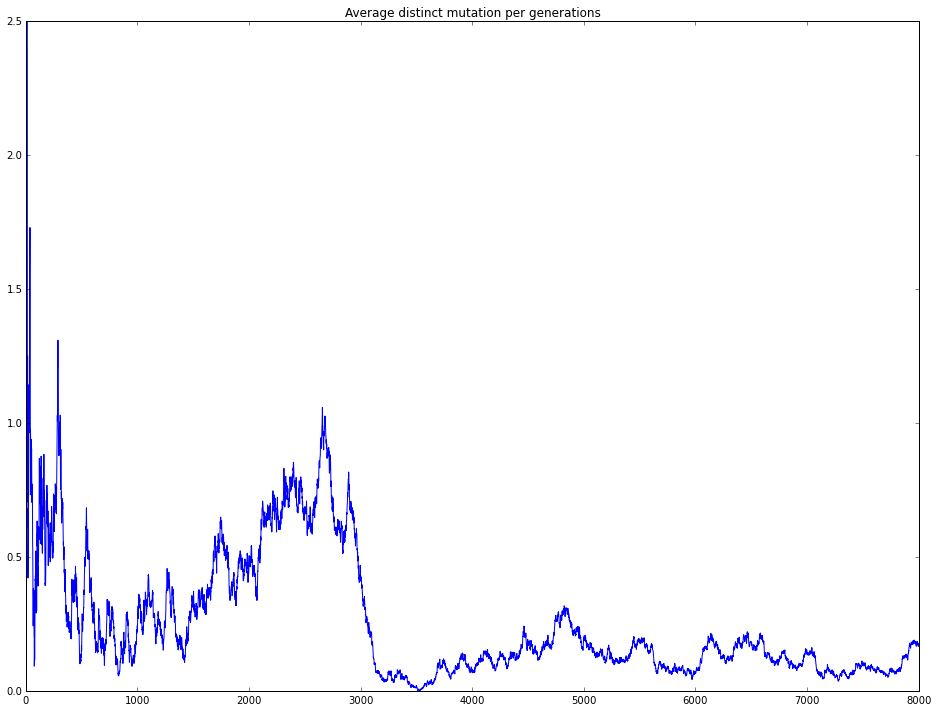

In [7]:
pylab.rcParams['figure.figsize'] = (16.0, 12.0)
all_mutations = run_generations('poisson')
plt.plot(range(1,generations+1),[np.mean(x) for x in all_mutations])
plt.title('Average distinct mutation per generations')

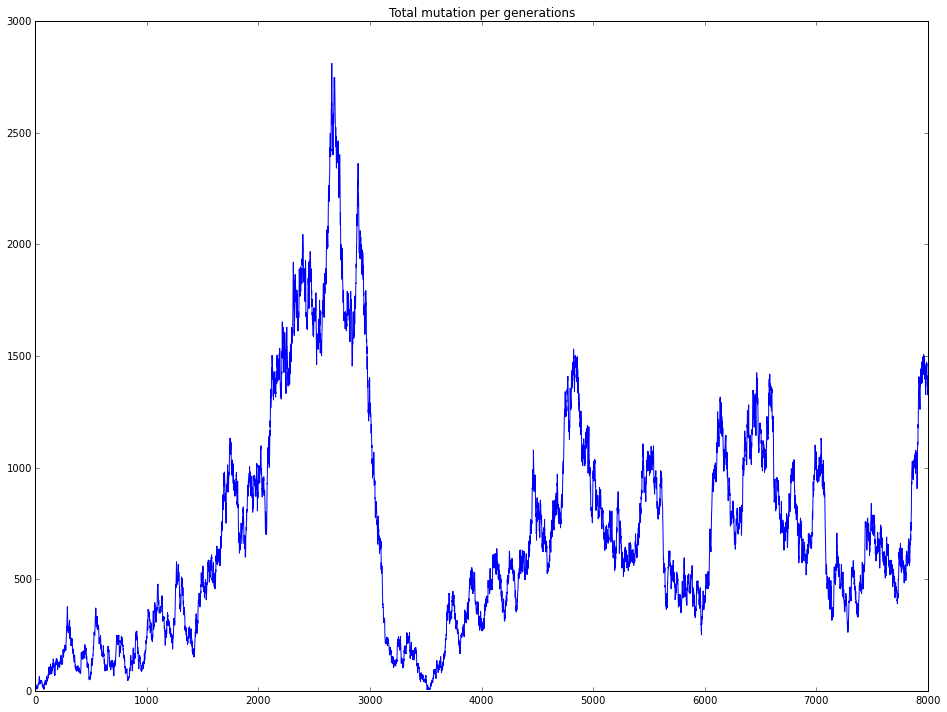

In [8]:
plt.plot(range(1,generations+1),[np.sum(x) for x in all_mutations])
plt.title('Total mutation per generations')

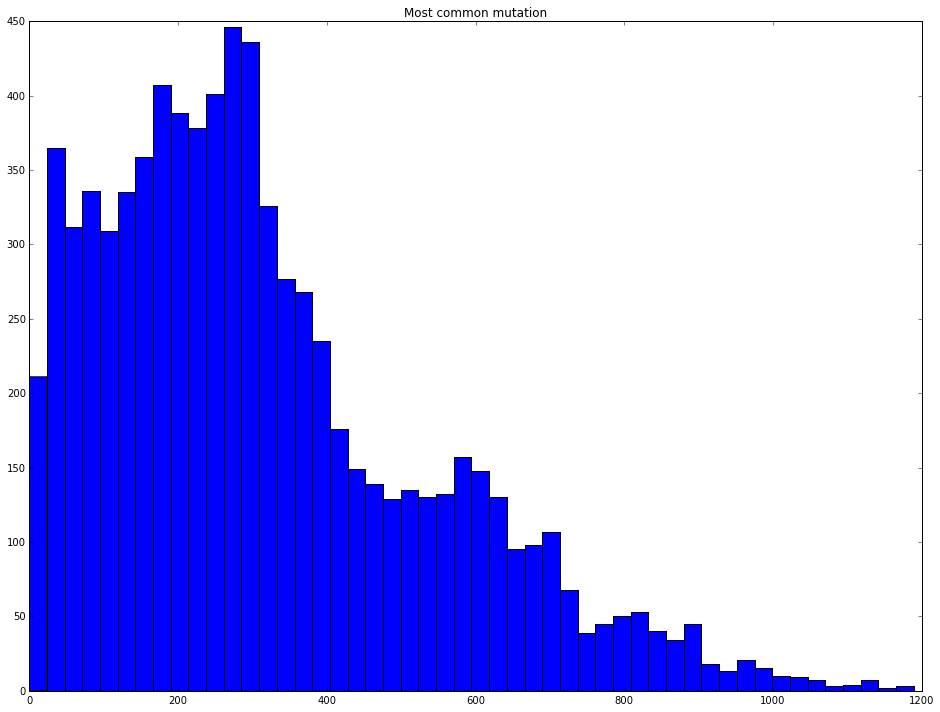

In [9]:
plt.hist([np.max(x) for x in all_mutations], 50)
plt.title('Most common mutation')

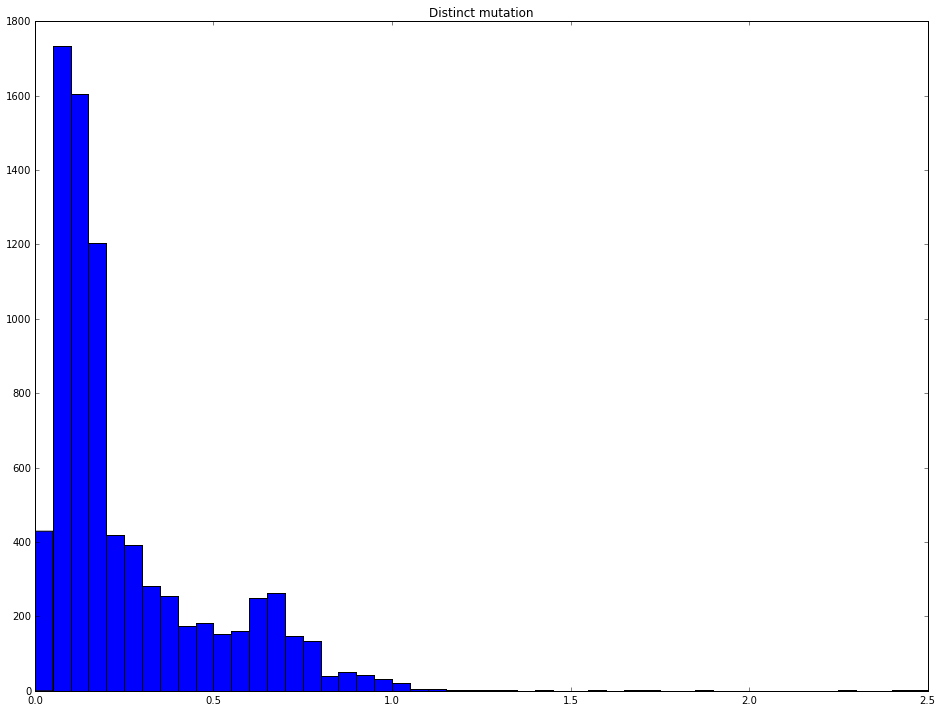

In [10]:
plt.hist([np.mean(x) for x in all_mutations], 50)
plt.title('Distinct mutation')

## Poisson Results

In [11]:
mu = 10**-6
s = 0.001
N= 10**6
theoretical_tot_mut = mu*N/s
print(theoretical_tot_mut)

1000.0


In [1]:
print ('Average total mutations per generation: {}'.format(np.mean([np.sum(x) for x in all_mutations])))
print ('Average distinct mutations per generation: {}'.format(np.mean([len(x) for x in all_mutations])))
print ('Theoretical total mutations per generation: {}'.format(theoretical_tot_mut))


NameError: name 'np' is not defined

## Binomial

In [ ]:
pylab.rcParams['figure.figsize'] = (16.0, 12.0)
all_mutations = run_generations('binomial')
plt.plot(range(1,generations+1),[np.mean(x) for x in all_mutations])
plt.title('Average distinct mutation per generations')

In [ ]:
plt.plot(range(1,generations+1),[np.sum(x) for x in all_mutations])
plt.title('Total mutation per generations')

In [ ]:
plt.hist([np.max(x) for x in all_mutations], 50)
plt.title('Most common mutation')

In [ ]:
plt.hist([np.mean(x) for x in all_mutations], 50)
plt.title('Distinct mutation')

## Binomial results


In [ ]:
mu = 10**-6
s=0.001
N= 10**6
theoretical_tot_mut = mu*N/s
print(theoretical_tot_mut)

print ('Average total mutations per generation: {}'.format(np.mean([np.sum(x) for x in all_mutations])))
print ('Average distinct mutations per generation: {}'.format(np.mean([len(x) for x in all_mutations])))
print ('Theoretical total mutations per generation: {}'.format(theoretical_tot_mut))